In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import random
import math
import seaborn as sns; sns.set()
import osmapi
import smopy
from datetime import datetime

%matplotlib inline

In [129]:
#read in already cleaned up data

dataset = pd.read_csv("../../crimeData.csv", sep = "\t", header = 0)
dataset.head(4)

,Unnamed: 0,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,0,12/31/2015,23:45:00,12/31/2015,113,FORGERY,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,INSIDE,BAR/NIGHT CLUB,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,1,12/31/2015,23:36:00,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,OUTSIDE,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,2,12/31/2015,23:30:00,12/31/2015,117,DANGEROUS DRUGS,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,NaN,OTHER,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,3,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,INSIDE,RESIDENCE-HOUSE,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"


In [138]:

dataset['CMPLNT_FR_DT'] = pd.to_datetime(dataset['CMPLNT_FR_DT'],format = '%m/%d/%Y',errors='coerce')
dataset.index = dataset['CMPLNT_FR_DT']
dataset[dataset.OFNS_DESC == 'GRAND LARCENY']

,Unnamed: 0,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
CMPLNT_FR_DT,,,,,,,,,,,,,,,,,,
2015-12-31,12,2015-12-31,23:00:00,12/31/2015,109,GRAND LARCENY,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,14.0,NaN,STREET,987215.0,215403.0,40.757916,-73.989299,"(40.757915693, -73.98929902)"
2015-12-31,13,2015-12-31,23:00:00,12/31/2015,109,GRAND LARCENY,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,14.0,NaN,STREET,987215.0,215403.0,40.757916,-73.989299,"(40.757915693, -73.98929902)"
2015-12-31,16,2015-12-31,23:00:00,12/31/2015,109,GRAND LARCENY,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,17.0,INSIDE,RESTAURANT/DINER,993034.0,214414.0,40.755197,-73.968296,"(40.755197275, -73.968296117)"
2015-12-31,72,2015-12-31,21:30:00,12/31/2015,109,GRAND LARCENY,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,115.0,INSIDE,RESIDENCE - APT. HOUSE,1017904.0,212282.0,40.749286,-73.878540,"(40.749285799, -73.878540057)"
2015-12-31,121,2015-12-31,19:45:00,12/31/2015,109,GRAND LARCENY,COMPLETED,FELONY,N.Y. POLICE DEPT,BROOKLYN,70.0,INSIDE,RESIDENCE - APT. HOUSE,995904.0,177893.0,40.654952,-73.958000,"(40.654952417, -73.958000222)"
2015-12-31,140,2015-12-31,19:10:00,12/31/2015,109,GRAND LARCENY,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,40.0,NaN,STREET,1007290.0,236782.0,40.816566,-73.916763,"(40.816565791, -73.91676323)"
2015-12-31,141,2015-12-31,19:10:00,12/31/2015,109,GRAND LARCENY,COMPLETED,FELONY,N.Y. POLICE DEPT,BROOKLYN,79.0,FRONT OF,STREET,1000272.0,187022.0,40.680003,-73.942236,"(40.680002664, -73.942236182)"
2015-12-31,165,2015-12-31,18:30:00,12/31/2015,109,GRAND LARCENY,COMPLETED,FELONY,N.Y. POLICE DEPT,BROOKLYN,83.0,FRONT OF,STREET,1006293.0,194328.0,40.700043,-73.920504,"(40.700043002, -73.920504347)"
2015-12-31,189,2015-12-31,16:30:00,12/31/2015,109,GRAND LARCENY,COMPLETED,FELONY,N.Y. POLICE DEPT,BROOKLYN,75.0,INSIDE,DRY CLEANER/LAUNDRY,1016183.0,186249.0,40.677838,-73.884875,"(40.677837858, -73.884874827)"


In [139]:

# for year in range(2010,2016):
#     for month in range(1, 13):
finalSet = dataset[['Unnamed: 0']]      

In [135]:
count = []
for year in range(2010,2016):
    for month in range(1, 13):
        date_str = str(year) + '-' + str(month)
        newSet = dataset[date_str]
        total = newSet['Unnamed: 0'].sum()
        count.append(total)

In [141]:
finalSet['2015-12-31']

,Unnamed: 0
CMPLNT_FR_DT,
2015-12-31,0
2015-12-31,1
2015-12-31,2
2015-12-31,3
2015-12-31,4
2015-12-31,5
2015-12-31,6
2015-12-31,7
2015-12-31,8


In [7]:
#aggregate locations

#number of grids on x-axis (starting at 1)
resX = 200;
#number of grids on y-axis
resY = 200;

#identify the x,y edges of the data
x_max = dataset['X_COORD_CD'].max()
x_min = dataset['X_COORD_CD'].min()
y_max = dataset['Y_COORD_CD'].max()
y_min = dataset['Y_COORD_CD'].min()

xCoordinate = dataset['X_COORD_CD']
yCoordinate = dataset['Y_COORD_CD']

#distances along x and y axis
rangeX = x_max - x_min
rangeY = y_max - y_min

#linear transformations
kX = (resX-1)/rangeX
cX = x_min*kX -1
newX = round(kX * xCoordinate - cX)
kY = (resY-1)/rangeY
cY = y_min*kY -1
newY = round(kY * yCoordinate - cY)

newX = newX.astype(int)
newY = newY.astype(int)

dataset['New_X_Coor'] = newX
dataset['New_Y_Coor'] = newY

In [8]:
#make frequency matrix for heat map generation
count  = np.zeros((resX, resY))
for i in range (0,len(newX)):
    x = newX[i] -1
    y = newY[i] -1
    count[x][y] = count[x][y] + 1
    


In [12]:
smopy.TILE_SERVER = "http://tile.basemaps.cartocdn.com/light_all/{z}/{x}/{y}@2x.png"
#smopy.TILE_SIZE = 512
latMax = dataset['Latitude'].max()
latMin = dataset['Latitude'].min()
lonMax = dataset['Longitude'].max()
lonMin = dataset['Longitude'].min()
map = smopy.Map((latMin, lonMin, latMax, lonMax))

Lowered zoom level to keep map size reasonable. (z = 10)


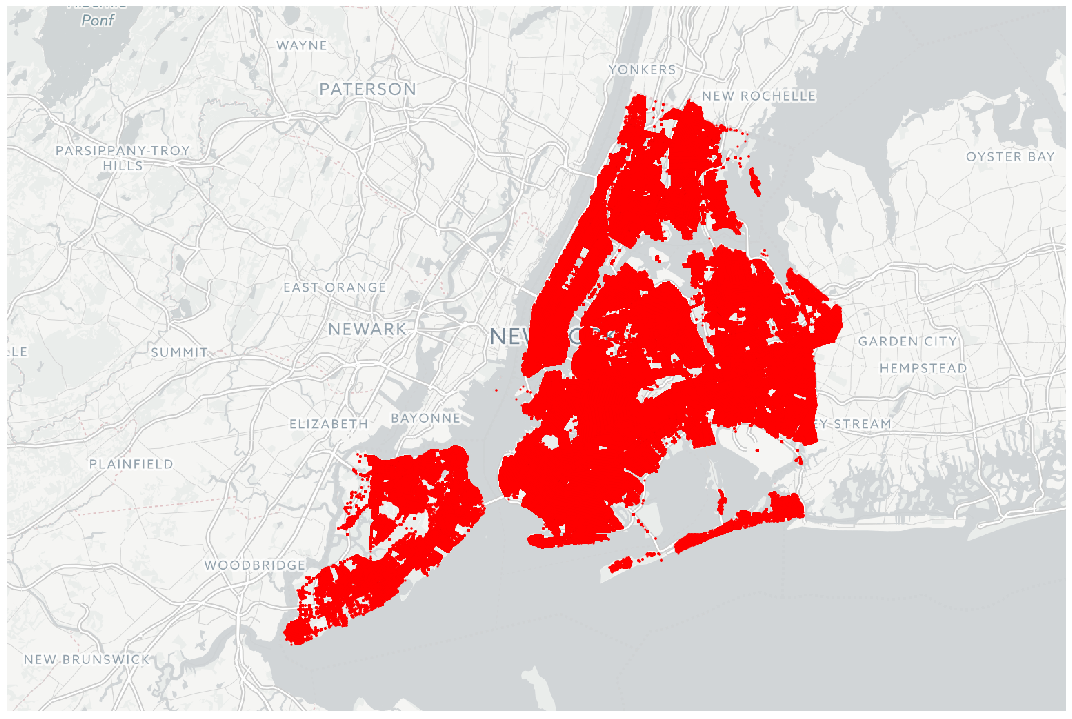

In [52]:
x, y = map.to_pixels(dataset['Latitude'], dataset['Longitude'])
ax = map.show_mpl(figsize=(15, 15))
ax.plot(x, y, 'or', ms=1, mew=1);

In [9]:
dataset.head(30)

,Unnamed: 0,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New_X_Coor,New_Y_Coor
0,0,12/31/2015,23:45:00,12/31/2015,113,FORGERY,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,INSIDE,BAR/NIGHT CLUB,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)",122,160
1,1,12/31/2015,23:36:00,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,OUTSIDE,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)",170,97
2,2,12/31/2015,23:30:00,12/31/2015,117,DANGEROUS DRUGS,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,NaN,OTHER,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)",112,147
3,3,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,INSIDE,RESIDENCE-HOUSE,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)",191,76
4,4,12/31/2015,23:25:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,FRONT OF,OTHER,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)",97,116
5,5,12/31/2015,23:18:00,12/31/2015,106,FELONY ASSAULT,ATTEMPTED,FELONY,N.Y. POLICE DEPT,BROOKLYN,71.0,FRONT OF,DRUG STORE,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)",108,81
6,6,12/31/2015,23:15:00,12/31/2015,235,DANGEROUS DRUGS,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,7.0,OPPOSITE OF,STREET,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)",97,108
7,7,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,46.0,FRONT OF,STREET,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)",125,168
8,8,12/31/2015,23:15:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,48.0,INSIDE,RESIDENCE - APT. HOUSE,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)",131,173
9,9,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,19.0,INSIDE,DRUG STORE,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)",106,129


In [74]:
import folium
import os
NY_Coor = [40.6, -74]
# myMap = folium.Map(NY_Coor)
# folium.TileLayer('cartodbpositron').add_to(myMap)

#definition of the boundaries in the map
pc_geo = os.path.join('nyc-maps', 'police_precincts.geojson')
 
#calculating total number of incidents per district
crimedata2 = pd.DataFrame(dataset['ADDR_PCT_CD'].value_counts()).astype(int)
crimedata2 = crimedata2.reset_index()
crimedata2.columns = ['Precinct', 'Number']
crimedata2['Precinct'] = crimedata2.Precinct.astype(int)
 
#creation of the choropleth
myMap = folium.Map(width=1500, height=700, tiles = "cartodbpositron",location=NY_Coor, zoom_start=10)




myMap.choropleth(geo_data = pc_geo,  
                name = 'Total number of crimes',
              data = crimedata2,
              columns = ['Precinct', 'Number'],
              key_on = 'feature.properties.Precinct',
              fill_color = 'YlOrRd', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Number of incidents per precinct',highlight=True)

c_type = ['PETIT LARCENY']
petit_larceny = dataset[dataset.OFNS_DESC.isin(c_type)]
crimedata3 = pd.DataFrame(petit_larceny['ADDR_PCT_CD'].value_counts()).astype(int)
crimedata3 = crimedata3.reset_index()
crimedata3.columns = ['Precinct', 'Number']
crimedata3['Precinct'] = crimedata3.Precinct.astype(int)

myMap.choropleth(geo_data = pc_geo,  
                name = 'Petit Larceny',
              data = crimedata3,
              columns = ['Precinct', 'Number'],
              key_on = 'feature.properties.Precinct',
              fill_color = 'YlGn', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Number of petit larceny per precinct',highlight=True)

c_type = ['GRAND LARCENY']
petit_larceny = dataset[dataset.OFNS_DESC.isin(c_type)]
crimedata4 = pd.DataFrame(petit_larceny['ADDR_PCT_CD'].value_counts()).astype(int)
crimedata4 = crimedata4.reset_index()
crimedata4.columns = ['Precinct', 'Number']
crimedata4['Precinct'] = crimedata4.Precinct.astype(int)

myMap.choropleth(geo_data = pc_geo,  
                name = 'Grand Larceny',
              data = crimedata4,
              columns = ['Precinct', 'Number'],
              key_on = 'feature.properties.Precinct',
              fill_color = 'PuBu', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Number of grand larceny per precinct',highlight=True)

c_type = ['VEHICLE AND TRAFFIC LAWS']
petit_larceny = dataset[dataset.OFNS_DESC.isin(c_type)]
crimedata5 = pd.DataFrame(petit_larceny['ADDR_PCT_CD'].value_counts()).astype(int)
crimedata5 = crimedata5.reset_index()
crimedata5.columns = ['Precinct', 'Number']
crimedata5['Precinct'] = crimedata5.Precinct.astype(int)

myMap.choropleth(geo_data = pc_geo,  
                name = 'Vehicle and traffic law violations',
              data = crimedata5,
              columns = ['Precinct', 'Number'],
              key_on = 'feature.properties.Precinct',
              fill_color = 'YlGnBu', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Number of vehicle and traffic law violations',highlight=True)

c_type = ['ARSON']
petit_larceny = dataset[dataset.OFNS_DESC.isin(c_type)]
crimedata6 = pd.DataFrame(petit_larceny['ADDR_PCT_CD'].value_counts()).astype(int)
crimedata6 = crimedata6.reset_index()
crimedata6.columns = ['Precinct', 'Number']
crimedata6['Precinct'] = crimedata6.Precinct.astype(int)

myMap.choropleth(geo_data = pc_geo,  
                name = 'Arson',
              data = crimedata6,
              columns = ['Precinct', 'Number'],
              key_on = 'feature.properties.Precinct',
              fill_color = 'RdPu', 
              fill_opacity = 0.7, 
              line_opacity = 0.2,
              legend_name = 'Number of Arson',
                highlight=True)

folium.LayerControl().add_to(myMap)

In [75]:
myMap.save('precinct_freq_whole.html')